In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/grade/KL_grade_project.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   File_name_pic  55 non-null     object
 1   KL0            55 non-null     int64 
 2   KL1            55 non-null     int64 
 3   KL2            55 non-null     int64 
 4   KL3            55 non-null     int64 
 5   KL4            55 non-null     int64 
 6   grade          55 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.1+ KB


,File_name_pic,KL0,KL1,KL2,KL3,KL4,grade
0,00000104_1,1,0,0,0,0,0
1,00000104_2,1,0,0,0,0,0
2,00000204_1,1,0,0,0,0,0
3,00000204_2,1,0,0,0,0,0
4,00000804_2,1,0,0,0,0,0
5,00001604_1,1,0,0,0,0,0
6,00002104_2,1,0,0,0,0,0
7,00003104_1,1,0,0,0,0,0
8,00003104_2,1,0,0,0,0,0
9,00003304_1,1,0,0,0,0,0


In [22]:
print(df['grade'].value_counts().sort_index())

print('Grade 0 : {}'.format((df['KL0']==1).sum()))
print('Grade 1 : {}'.format((df['KL1']==1).sum()))
print('Grade 2 : {}'.format((df['KL2']==1).sum()))
print('Grade 3 : {}'.format((df['KL3']==1).sum()))
print('Grade 4 : {}'.format((df['KL4']==1).sum()))

0    18
1     8
2     6
3    11
4    12
Name: grade, dtype: int64
Grade 0 : 18
Grade 1 : 8
Grade 2 : 6
Grade 3 : 11
Grade 4 : 12


([<matplotlib.axis.XTick at 0x1f58772f940>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

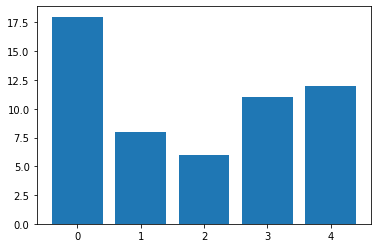

In [52]:
grade_count = df['grade'].value_counts().sort_index()
plt.bar(range(len(grade_count)), grade_count.values, align='center')
plt.xticks(range(len(grade_count)), grade_count.index.values)

# grade_counts = pd.DataFrame(grade_count)
# grade_counts
# grade_counts = grade_counts.astype(np.int16)
# grade_counts.columns=['counts']  
# grade_counts

In [53]:
import os
from glob import glob

In [54]:
os.getcwd()

'C:\\PythonAI_Project\\Workspace'

In [55]:
image_dir = '../../labelling/'
bbox_dir = '../../labelling/'

In [56]:
image_files=glob(image_dir + '*.jpg')
len(image_files)

55

In [57]:
bbox_files = glob(bbox_dir + "*.xml")
len(bbox_files)

55

In [58]:
import cv2
import xml.etree.ElementTree as et   
from matplotlib.patches import Rectangle 

In [59]:
# 임의의 파일 설정
test = 40

../../labelling\00003504_2.xml


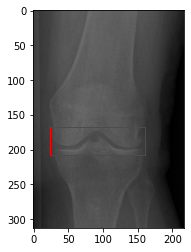

In [60]:
image_path = image_files[test] 
bbox_path = bbox_files[test]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(bbox_path)
tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

In [61]:
from sklearn.model_selection import KFold

In [155]:
from sklearn.model_selection import StratifiedKFold

In [156]:
# n_split : 몇개로 분할할지
# shuffle : Fold를 나누기 전에 무작위로 섞을지
# random_state : 나눈 Fold를 그대로 사용할지
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['grade']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx 

[ 2  3  5  6  7  8 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29
 30 33 34 35 36 37 38 39 40 42 43 44 45 46 47 49 51 52 53 54] [ 0  1  4  9 18 28 31 32 41 48 50] 11
[ 0  1  2  4  5  6  7  8  9 10 11 13 15 16 18 19 20 21 23 24 26 27 28 29
 31 32 33 34 35 36 37 38 41 42 43 45 46 47 48 50 51 52 53 54] [ 3 12 14 17 22 25 30 39 40 44 49] 11
[ 0  1  3  4  5  6  7  9 11 12 13 14 16 17 18 20 21 22 23 24 25 26 27 28
 30 31 32 35 36 37 39 40 41 42 44 45 46 47 48 49 50 51 52 54] [ 2  8 10 15 19 29 33 34 38 43 53] 11
[ 0  1  2  3  4  6  7  8  9 10 11 12 14 15 17 18 19 20 22 25 26 27 28 29
 30 31 32 33 34 35 36 38 39 40 41 43 44 45 47 48 49 50 51 53] [ 5 13 16 21 23 24 37 42 46 52 54] 11
[ 0  1  2  3  4  5  8  9 10 12 13 14 15 16 17 18 19 21 22 23 24 25 28 29
 30 31 32 33 34 37 38 39 40 41 42 43 44 46 48 49 50 52 53 54] [ 6  7 11 20 26 27 35 36 45 47 51] 11


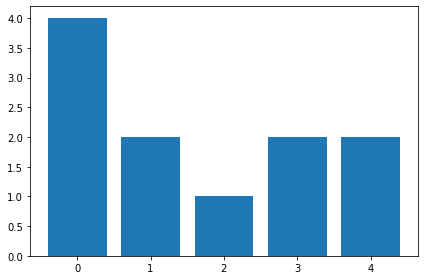

In [157]:
value_counts = df[df['fold'] ==1]['grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

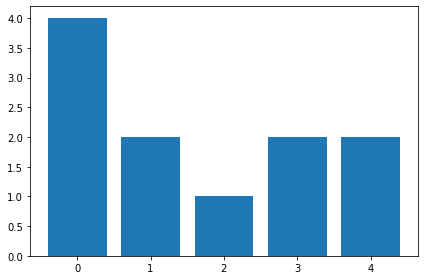

In [158]:
value_counts = df[df['fold'] ==2]['grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

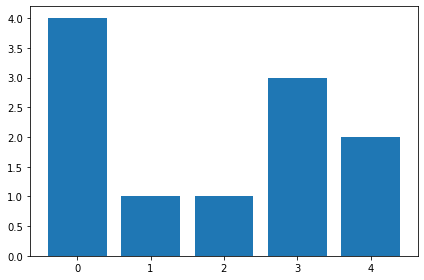

In [159]:
value_counts = df[df['fold'] ==3]['grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

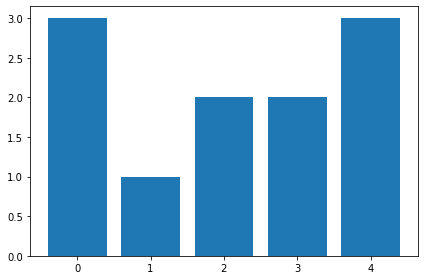

In [160]:
value_counts = df[df['fold'] ==4]['grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

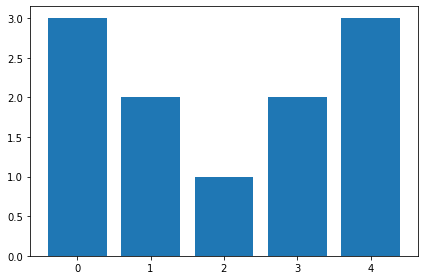

In [161]:
value_counts = df[df['fold'] ==5]['grade'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [164]:
df.to_csv('./data/grade/KLgrade_kfold.csv', index=False) # 저장하기 /경로는 각자 컴퓨터에 맞게 수정